# FaceCheck: AI Detection 
*Author: Andy Shen*

## Overview

In today's digital world, anyone can manipulate images and videos with relative ease. Distinguishing real faces from AI-generated ones has become increasingly crucial. 


FaceCheck is a AI image classifier that is trained on 1000 fake and real images to discern genuine faces from a synthetic one. 

## Business Problem

There is a variety of problems that comes with facial image fabrication.

- Misinformation: Deepfakes can be used to fabricate news or spread fake news for political gain
- Financial fraud: Fake identities can be used to commit identity theft, open fraudulent accounts, and bypass security measures.
- Manipulation: Fake identities can be used to impersonal individuals and deceive audiences

FaceCheck equips individuals with the ability to detect and verify faces. FaceCheck will allow users to:

- Verify the authenticity of online profiles and interactions.
- Protect themselves from online scams and phishing attempts.
- Contribute to a safer and reliable online experience

## Data Understanding

The dataset comes from https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection/ .

In [291]:
## Imports
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras import models
from keras import layers
from keras import optimizers

import random
import cv2

In [292]:
os.listdir('data/')

['training_fake', 'training_real']

In [293]:
#Directory Path
real = "data/training_real/"
fake = "data/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [294]:
categories = ['Real', 'AIGenerated']

### Visualizing Our Data

In [295]:
## function for loading image
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

In [296]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.title('real')
    plt.axis('off')

plt.show()

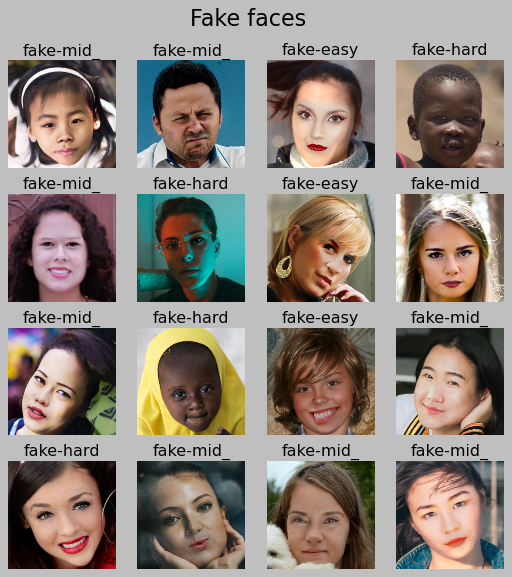

In [298]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    rand = random.randrange(900)
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i+rand]), cmap='gray')
    plt.suptitle("Fake faces",fontsize=20)
    plt.title('fake-'+ fake_path[i+rand][:4])
    plt.axis('off')

plt.show()

In [20]:
dataset_path = "../AI-Facial-Detection/data/"

In [287]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.2)

In [288]:
train_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

Found 1633 images belonging to 2 classes.


In [290]:
val_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 408 images belonging to 2 classes.


# Modeling

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D

In [198]:
##function for displaying results graph
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'], loc=3)
    plt.grid(True)
    plt.style.use(['classic'])

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'], loc=3)
    plt.grid(True)
    plt.style.use(['classic'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Baseline model

Our baseline model will be a single Dense layer neural net

In [214]:
model1 = Sequential([
    Flatten(input_shape=(96,96,3)),  # Flatten the 2D image
    Dense(128, activation='relu'),  # Dense layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

In [215]:
model1.layers[0].trainable = False
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 27648)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3539072   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 3,540,362
Trainable params: 3,540,362
Non-trainable params: 0
_________________________________________________________________


In [216]:
hist1 = model1.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/20
52/52 [==============================] - 23s 441ms/step - loss: 6.4686 - accuracy: 0.4991 - val_loss: 3.7134 - val_accuracy: 0.5270
Epoch 2/20
52/52 [==============================] - 23s 444ms/step - loss: 1.9946 - accuracy: 0.5769 - val_loss: 8.9886 - val_accuracy: 0.4706
Epoch 3/20
52/52 [==============================] - 23s 439ms/step - loss: 2.7985 - accuracy: 0.5370 - val_loss: 1.7515 - val_accuracy: 0.4730
Epoch 4/20
52/52 [==============================] - 22s 417ms/step - loss: 1.0737 - accuracy: 0.6038 - val_loss: 1.2824 - val_accuracy: 0.4779
Epoch 5/20
52/52 [==============================] - 21s 410ms/step - loss: 0.8884 - accuracy: 0.6130 - val_loss: 1.0684 - val_accuracy: 0.5074
Epoch 6/20
52/52 [==============================] - 22s 432ms/step - loss: 0.8465 - accuracy: 0.6277 - val_loss: 1.0363 - val_accuracy: 0.5270
Epoch 7/20
52/52 [==============================] - 23s 442ms/step - loss: 0.7379 - accuracy: 0.6461 - val_loss: 0.9878 - val_accuracy: 0.5098

### Visualization for Base Model:

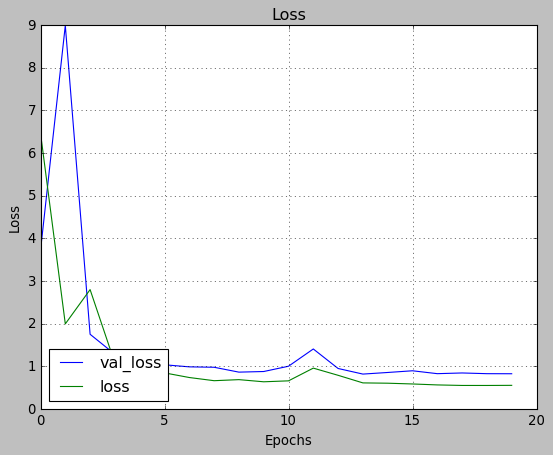

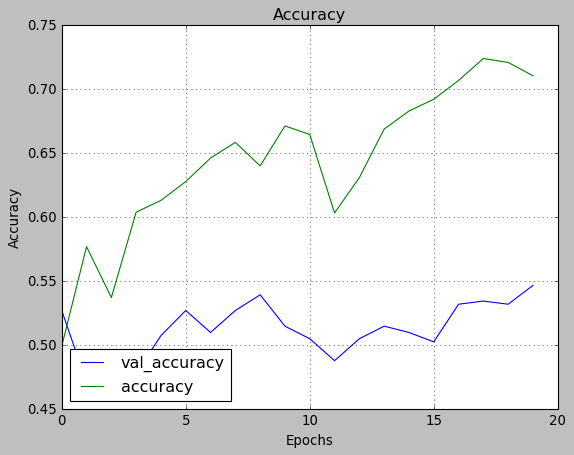

In [218]:
visualize_training_results(hist1)

### MobileNetV2 Model:

In [300]:
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

In [301]:
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(96,96,3))

In [302]:
tf.keras.backend.clear_session()

model2 = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    # Dense(32, activation = "relu"),
                    # Dropout(0.3),
                    Dense(2, activation = "softmax")])

model2.layers[0].trainable = False

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [303]:
# Callbacks

def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
hist2 = model2.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/20
52/52 [==============================] - 51s 981ms/step - loss: 0.8895 - accuracy: 0.5750 - val_loss: 0.9265 - val_accuracy: 0.4926
Epoch 2/20
52/52 [==============================] - 25s 485ms/step - loss: 0.5752 - accuracy: 0.7067 - val_loss: 0.9577 - val_accuracy: 0.5221
Epoch 3/20
52/52 [==============================] - 27s 510ms/step - loss: 0.4811 - accuracy: 0.7661 - val_loss: 0.9740 - val_accuracy: 0.5172
Epoch 4/20
52/52 [==============================] - 27s 515ms/step - loss: 0.3798 - accuracy: 0.8304 - val_loss: 0.9619 - val_accuracy: 0.5025
Epoch 5/20
52/52 [==============================] - 25s 475ms/step - loss: 0.3663 - accuracy: 0.8451 - val_loss: 0.9759 - val_accuracy: 0.4902
Epoch 6/20
52/52 [==============================] - 25s 485ms/step - loss: 0.3285 - accuracy: 0.8561 - val_loss: 0.9837 - val_accuracy: 0.5025
Epoch 7/20
52/52 [==============================] - 25s 487ms/step - loss: 0.3095 - accuracy: 0.8739 - val_loss: 1.0102 - val_accuracy: 0.4975

### Visualization for MobileNetV2


In [ ]:
visualize_training_results(hist2)

### VGG16 Model

In [28]:
train_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=98,
                                          subset="training")

val_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=98,
                                          subset="validation"
                                          )

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [29]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(96,96,3))

58892288/58889256 [==============================] - 2s 0us/step


In [33]:
model3 = Sequential([vgg16_model,
                    Flatten(),
#                     GlobalAveragePooling2D(),
#                     Dense(512, activation = "relu"),
#                     BatchNormalization(),
#                     Dropout(0.3),
#                     Dense(128, activation = "relu"),
#                     Dropout(0.1),
#                     # Dense(32, activation = "relu"),
#                     # Dropout(0.3),
                    Dense(2, activation = "softmax")])

model3.layers[0].trainable = False

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
hist3 =  model.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/20
17/17 [==============================] - 37s 2s/step - loss: 0.9460 - accuracy: 0.5818 - val_loss: 0.9121 - val_accuracy: 0.5515
Epoch 2/20
17/17 [==============================] - 36s 2s/step - loss: 0.6131 - accuracy: 0.7055 - val_loss: 0.7690 - val_accuracy: 0.5343
Epoch 3/20
17/17 [==============================] - 35s 2s/step - loss: 0.5001 - accuracy: 0.7551 - val_loss: 0.8326 - val_accuracy: 0.5221
Epoch 4/20
17/17 [==============================] - 35s 2s/step - loss: 0.4502 - accuracy: 0.7869 - val_loss: 0.8223 - val_accuracy: 0.4951
Epoch 5/20
17/17 [==============================] - 35s 2s/step - loss: 0.4070 - accuracy: 0.8077 - val_loss: 0.8432 - val_accuracy: 0.5074
Epoch 6/20
17/17 [==============================] - 35s 2s/step - loss: 0.3999 - accuracy: 0.8218 - val_loss: 0.8439 - val_accuracy: 0.5147
Epoch 7/20
17/17 [==============================] - 36s 2s/step - loss: 0.3896 - accuracy: 0.8267 - val_loss: 0.8489 - val_accuracy: 0.5147
Epoch 8/20
17/17 [==

### Visualization for VGG16

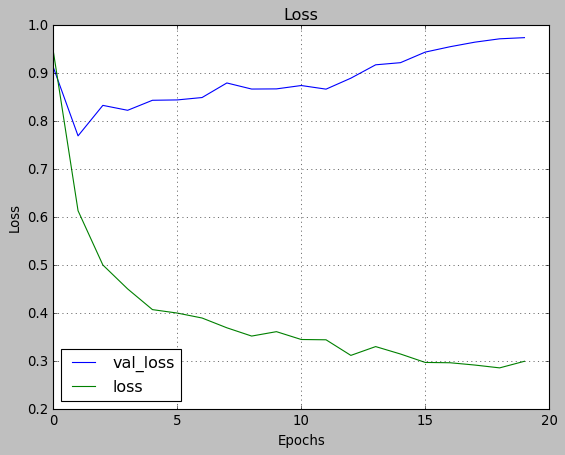

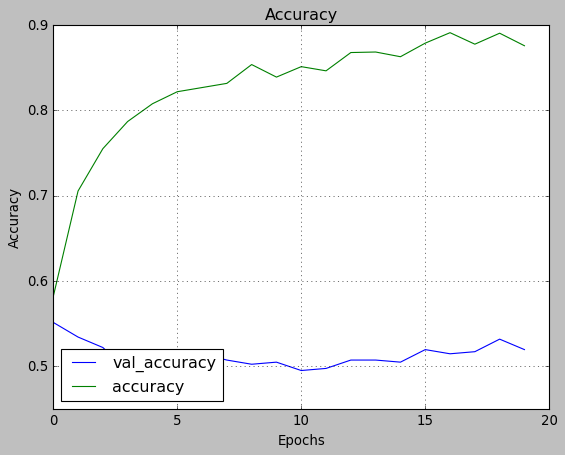

In [246]:
visualize_training_results(hist3)

### Custom Model 1:

In [224]:
model4 = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (96,96,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [225]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)      

In [226]:
hist4 =  model.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/20
52/52 [==============================] - 24s 458ms/step - loss: 0.7210 - accuracy: 0.5058 - val_loss: 0.7273 - val_accuracy: 0.4926
Epoch 2/20
52/52 [==============================] - 25s 478ms/step - loss: 0.7046 - accuracy: 0.4703 - val_loss: 0.6992 - val_accuracy: 0.5049
Epoch 3/20
52/52 [==============================] - 26s 500ms/step - loss: 0.6972 - accuracy: 0.5193 - val_loss: 0.6945 - val_accuracy: 0.5294
Epoch 4/20
52/52 [==============================] - 26s 507ms/step - loss: 0.6955 - accuracy: 0.4966 - val_loss: 0.6940 - val_accuracy: 0.5196
Epoch 5/20
52/52 [==============================] - 25s 480ms/step - loss: 0.6952 - accuracy: 0.5015 - val_loss: 0.6938 - val_accuracy: 0.5319
Epoch 6/20
52/52 [==============================] - 25s 473ms/step - loss: 0.6951 - accuracy: 0.5052 - val_loss: 0.6937 - val_accuracy: 0.5466
Epoch 7/20
52/52 [==============================] - 25s 480ms/step - loss: 0.6949 - accuracy: 0.4972 - val_loss: 0.6936 - val_accuracy: 0.5392

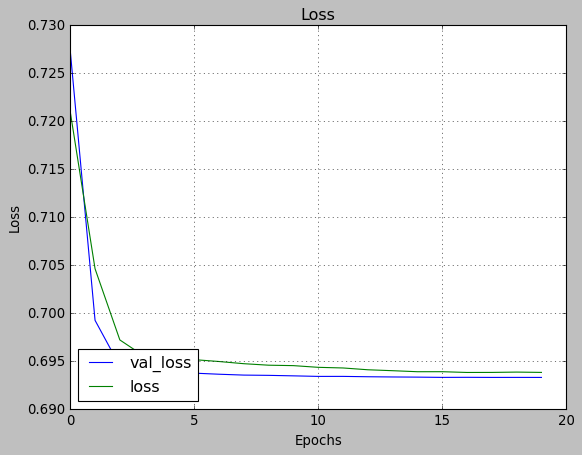

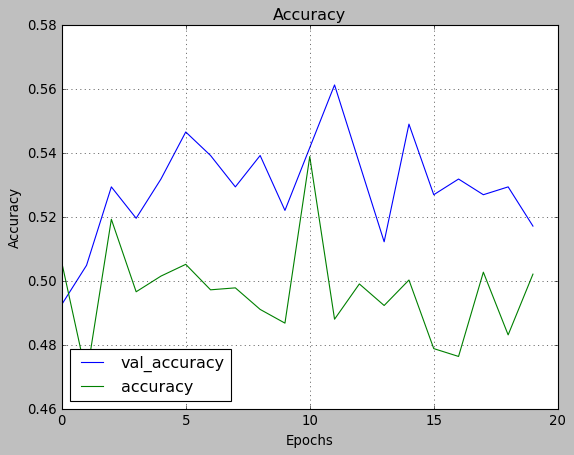

In [227]:
visualize_training_results(hist4)

### Custom Model 2:

In [257]:
Image_Size= 96
Batch_Size = 32
Channels=3
Epochs=20

In [258]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [259]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])


In [260]:
input_shape = (Batch_Size,Image_Size, Image_Size,Channels)
n_classes = 3

In [261]:
model5 = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),
    
])

model5.build(input_shape=input_shape)
model5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_15 (Sequential)   (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (32, 60, 60, 64)        

In [262]:
model5.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [264]:
hist5 =  model.fit_generator(train_generator,
                    epochs=120,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/120
52/52 [==============================] - 26s 501ms/step - loss: 0.6932 - accuracy: 0.4899 - val_loss: 0.6931 - val_accuracy: 0.4975
Epoch 2/120
52/52 [==============================] - 26s 506ms/step - loss: 0.6932 - accuracy: 0.5113 - val_loss: 0.6931 - val_accuracy: 0.4412
Epoch 3/120
52/52 [==============================] - 27s 520ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4608
Epoch 4/120
52/52 [==============================] - 27s 513ms/step - loss: 0.6931 - accuracy: 0.5217 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 5/120
52/52 [==============================] - 26s 498ms/step - loss: 0.6931 - accuracy: 0.5138 - val_loss: 0.6931 - val_accuracy: 0.5221
Epoch 6/120
52/52 [==============================] - 26s 505ms/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5270
Epoch 7/120
52/52 [==============================] - 27s 517ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy:

52/52 [==============================] - 26s 494ms/step - loss: 0.6931 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5270
Epoch 58/120
52/52 [==============================] - 26s 508ms/step - loss: 0.6931 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.4779
Epoch 59/120
52/52 [==============================] - 26s 502ms/step - loss: 0.6931 - accuracy: 0.4862 - val_loss: 0.6931 - val_accuracy: 0.4828
Epoch 60/120
52/52 [==============================] - 25s 480ms/step - loss: 0.6931 - accuracy: 0.4881 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 61/120
52/52 [==============================] - 25s 482ms/step - loss: 0.6931 - accuracy: 0.4844 - val_loss: 0.6931 - val_accuracy: 0.4828
Epoch 62/120
52/52 [==============================] - 25s 478ms/step - loss: 0.6931 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.4828
Epoch 63/120
52/52 [==============================] - 26s 493ms/step - loss: 0.6931 - accuracy: 0.4881 - val_loss: 0.6931 - val_accuracy: 0.524

KeyboardInterrupt: 

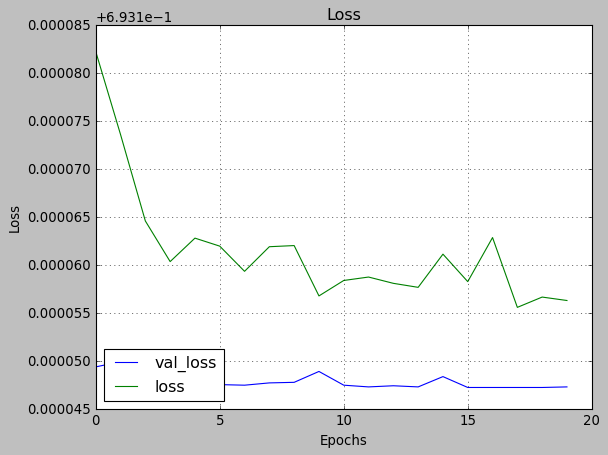

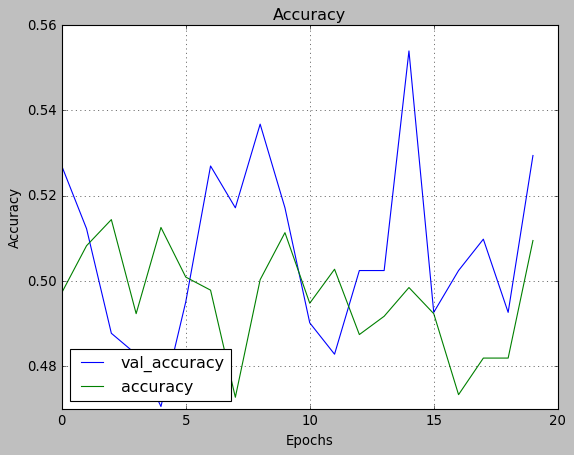

In [256]:
visualize_training_results(hist5)

## Predictions

In [72]:
predictions = model.predict_generator(val_generator)

In [172]:
random.randrange(300)

168

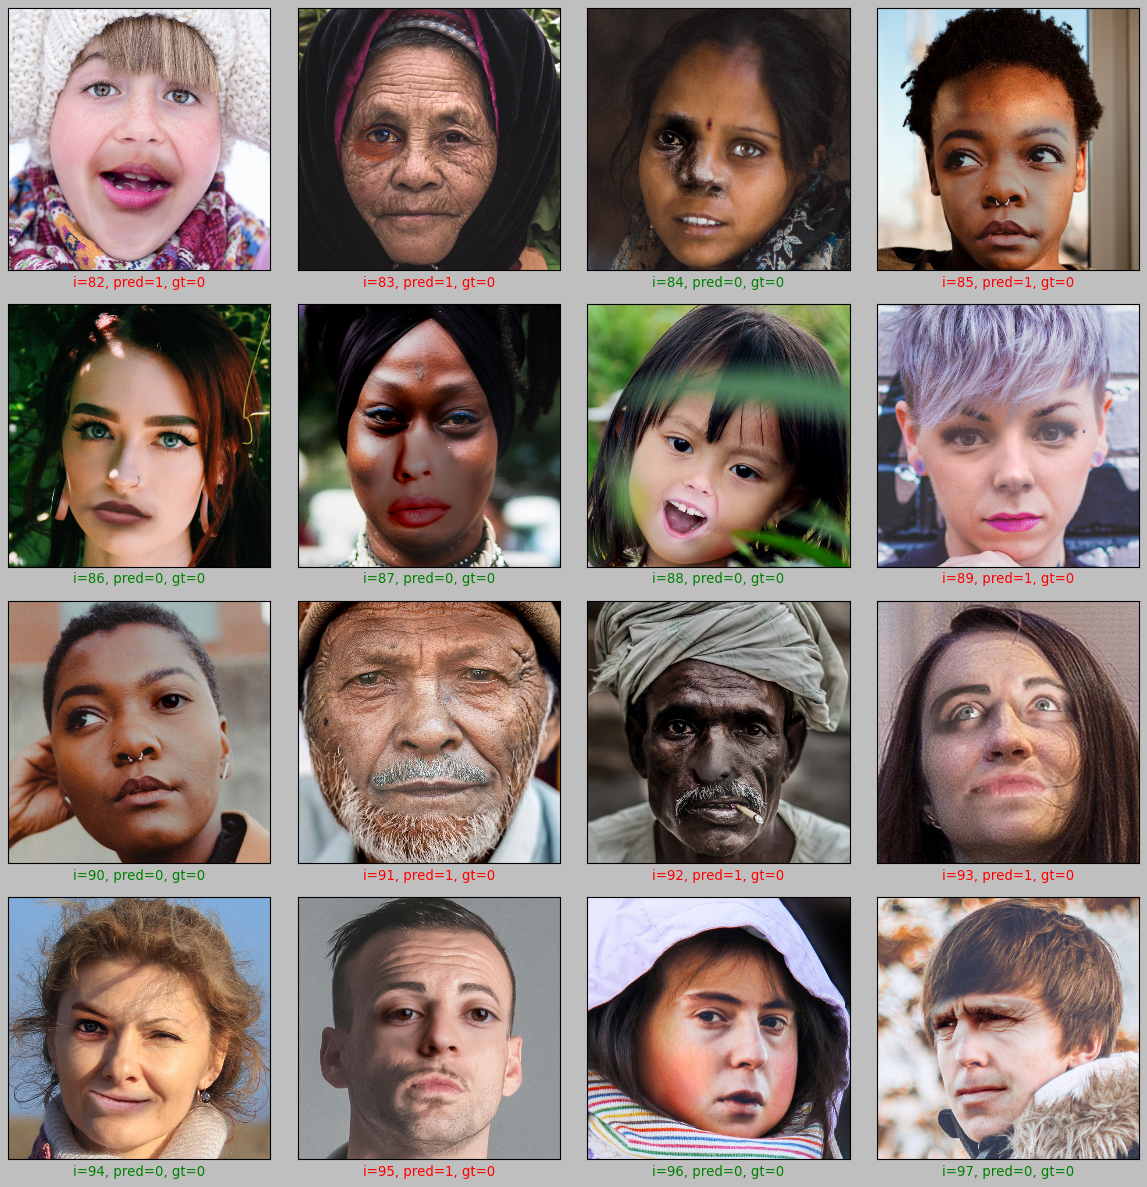

In [176]:
dataset_path
plt.figure(figsize=(15,15))

start_index = random.randrange(408)

for i in range(16):
  plt.subplot(4,4, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  preds = np.argmax(predictions[[start_index+i]])
    
  gt = val_generator.filenames[start_index+i][9:13]

  
  if gt == "fake":
    gt = 0
  else:
    gt = 1
    
  if preds != gt:
    col ="r"
  else:
    col = "g"

  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,preds,gt),color=col)
  plt.imshow(load_img(dataset_path+val_generator.filenames[start_index+i]))
  plt.tight_layout()

plt.show()

## Future Steps

Although testing accuracy has increased with different model tuning, the validation/testing accuracy is barely above 50%. 

We can:
- Increase training and testing data
- Continue to fine tune models

Future plans:  
- Connect a front end app that allows users to upload a picture and get feedback immediately